# Show some features

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

data = np.load('../data/qpesums_encoded/2014061420.enc.npy')
print(data.shape)

(1, 64)


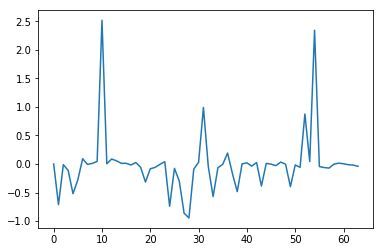

In [3]:
plt.plot(data[0,:])

## Feature Loadings for Heavy Rainfall Events



In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# The heavy rainfall cases
dates_p40 = pd.read_csv('../examples/data/dates_p40.csv')
print(dates_p40.head())

         date
0  2013051104
1  2013051105
2  2013052305
3  2013062316
4  2013062317


In [7]:
x_p40 = []
for ts in dates_p40['date']:
    xuri = '../data/qpesums_encoded/'+str(ts)+'.enc.npy'
    if os.path.exists(xuri):
        x_p40.append(np.load(xuri)[0,:])
    else:
        print('File doest not exist: '+xuri)

x_p40 = np.array(x_p40)
print(x_p40.shape)

File doest not exist: ../data/qpesums_encoded/2013082124.enc.npy
File doest not exist: ../data/qpesums_encoded/2014052024.enc.npy
File doest not exist: ../data/qpesums_encoded/2014062924.enc.npy
File doest not exist: ../data/qpesums_encoded/2014092416.enc.npy
File doest not exist: ../data/qpesums_encoded/2016100824.enc.npy
(234, 64)


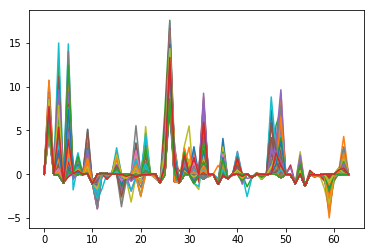

In [8]:
for i in range(x_p40.shape[0]):
    plt.plot(x_p40[i,:])

<ErrorbarContainer object of 3 artists>

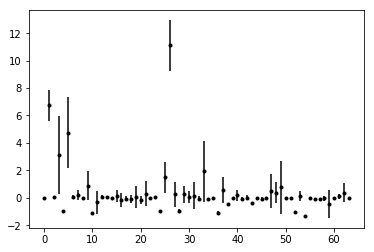

In [11]:
mu = np.mean(x_p40, axis=0)
std = np.std(x_p40, axis=0)
plt.errorbar(np.arange(64), mu, yerr=std, fmt='.k')

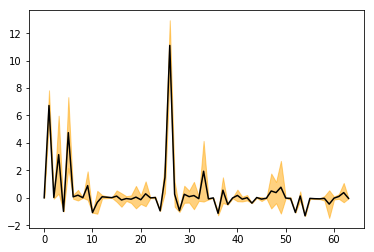

In [17]:
plt.fill_between(np.arange(64), mu-std, mu+std, color='orange', alpha=0.5)
plt.plot(mu, color='black')

(10848, 64)


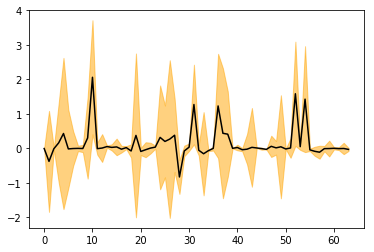

In [19]:
# Consider all cases with precipitation > 1mm
dates_p01 = pd.read_csv('../examples/data/dates_p01.csv')

x_p01 = []
p01_missing=[]
for ts in dates_p01['date']:
    xuri = '../data/qpesums_encoded/'+str(ts)+'.enc.npy'
    if (ts not in dates_p01['date']) and (os.path.exists(xuri)):
        x_p01.append(np.load(xuri)[0,:])
    else:
        p01_missing.append(xuri)

x_p01 = np.array(x_p01)
print(x_p01.shape)

mu_p01 = np.mean(x_p01, axis=0)
std_p01 = np.std(x_p01, axis=0)

plt.fill_between(np.arange(64), mu_p01-std_p01, mu_p01+std_p01, color='orange', alpha=0.5)
plt.plot(mu_p01, color='black')

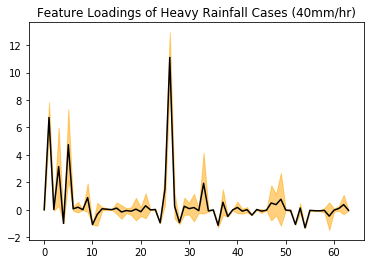

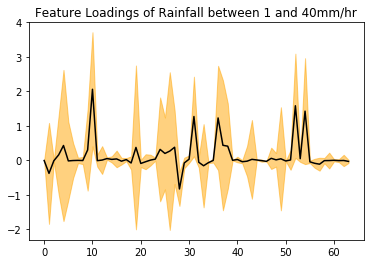

In [21]:
#
plt.fill_between(np.arange(64), mu-std, mu+std, color='orange', alpha=0.5)
plt.plot(mu, color='black')
plt.title('Feature Loadings of Heavy Rainfall Cases (40mm/hr)')
plt.show()
#
plt.fill_between(np.arange(64), mu_p01-std_p01, mu_p01+std_p01, color='orange', alpha=0.5)
plt.plot(mu_p01, color='black')
plt.title('Feature Loadings of Rainfall between 1 and 40mm/hr')
plt.show()